In [36]:
options(digits = 9)
options(repr.plot.width=18, repr.plot.height=10)

In [37]:
df_trm <- read.csv("trm.csv")
df_oil <- read.csv("ExpPETROLEO.csv")

In [38]:
df_trm$fecha <- as.Date(df_trm$fecha, format = "%d/%m/%Y")
df_oil$fecha <- as.Date(paste0("01-", df_oil$fecha), format = "%d-%b-%y")


In [39]:
df <- merge(df_trm, df_oil, by = "fecha", all = FALSE)
rm(df_trm, df_oil)
df$XOILCOP <- (df$ExpPetrol * df$TRM)/1000
df <- df[, c("fecha", "XOILCOP")]
head(df)

,fecha,XOILCOP
,<date>,<dbl>
1,1992-01-01,82815.1752
2,1992-02-01,65950.5013
3,1992-03-01,88541.4409
4,1992-04-01,79115.6893
5,1992-05-01,82805.9717
6,1992-06-01,64013.3782


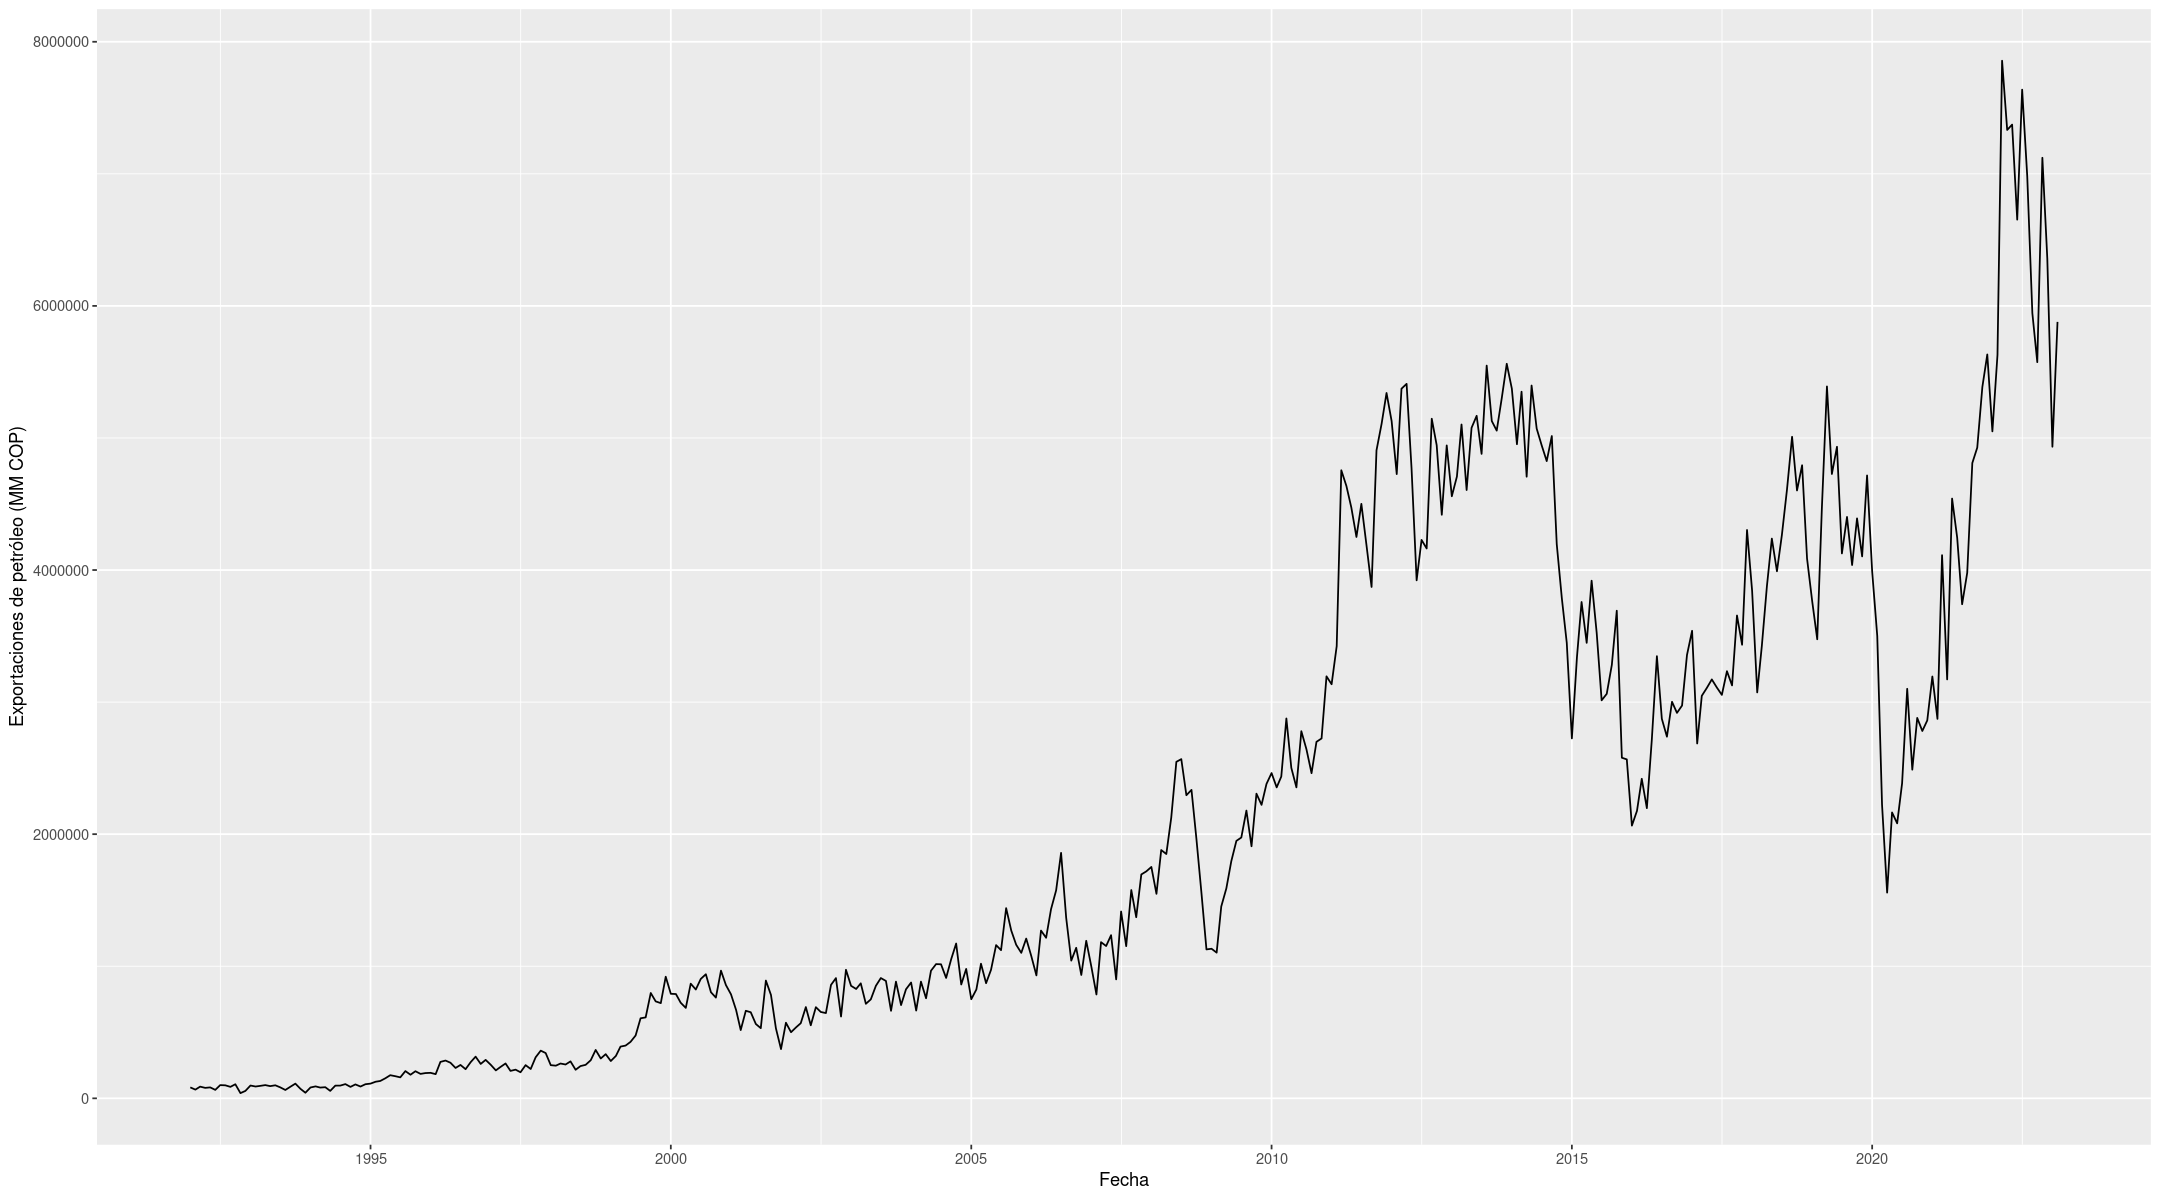

In [40]:
library(ggplot2)

ggplot(df, aes(x = fecha, y = XOILCOP)) + 
  geom_line() +
  xlab("Fecha") +
  ylab("Exportaciones de petróleo (MM COP)") +
  scale_y_continuous(labels = function(x) format(x, scientific = FALSE)) +
  scale_x_date(date_breaks = "5 years", date_labels = "%Y")

In [41]:
library(tseries)

myts <- ts(df$XOILCOP, start = 1992, frequency = 12)

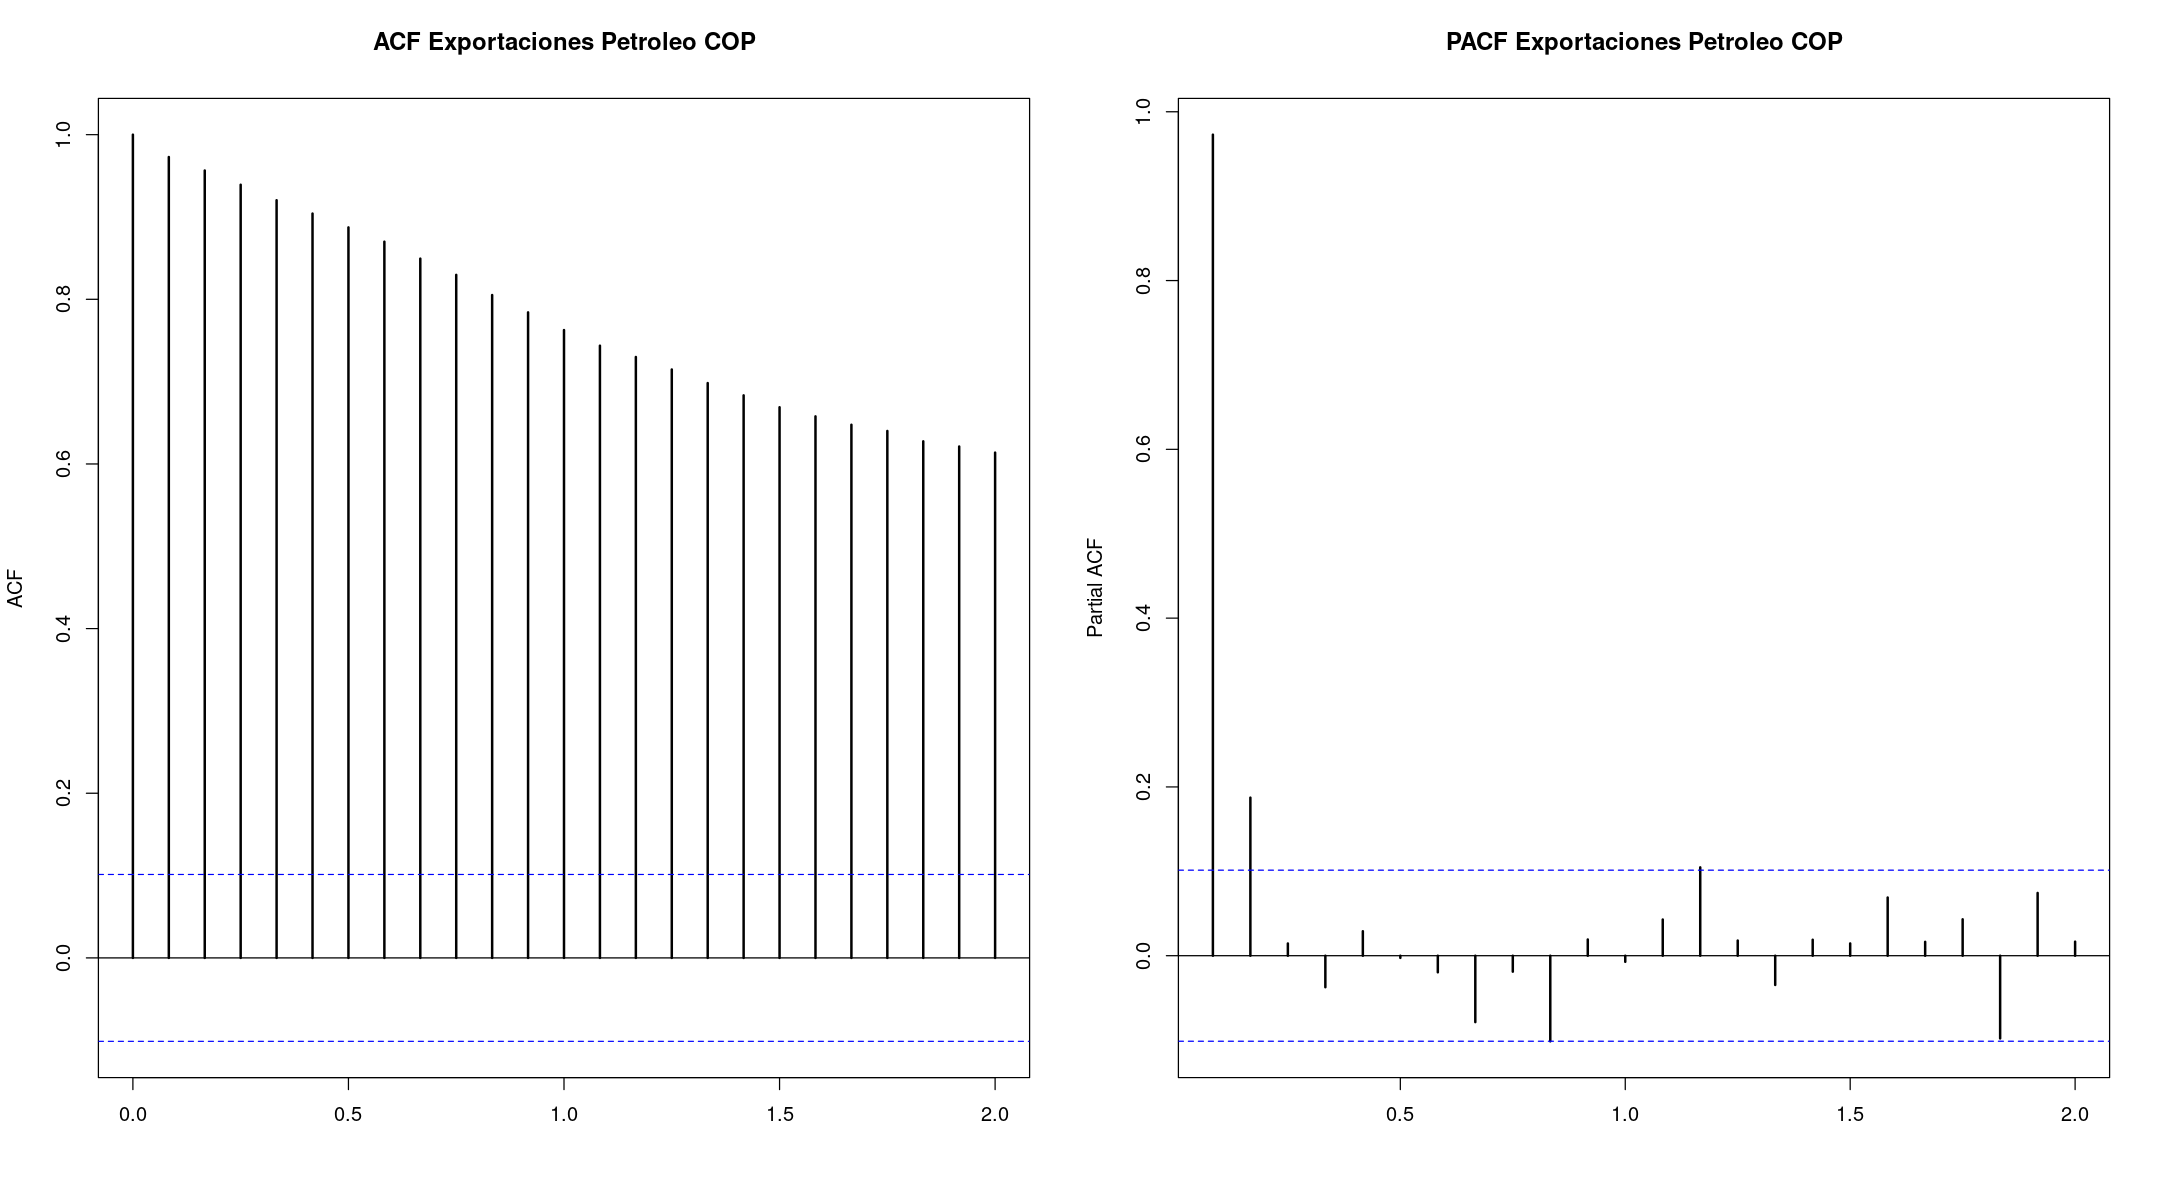

In [44]:
par(mfrow=c(1,2))
acf(myts,lag.max=24,plot=T,lwd=2,xlab='',main='ACF Exportaciones Petroleo COP') 
pacf(myts,lag.max=24,plot=T,lwd=2,xlab='',main='PACF Exportaciones Petroleo COP')


############################################### 
# Augmented Dickey-Fuller Test Unit Root Test # 
############################################### 

Test regression trend 


Call:
lm(formula = z.diff ~ z.lag.1 + 1 + tt + z.diff.lag)

Residuals:
       Min         1Q     Median         3Q        Max 
-1490426.4  -150968.0     2023.8   115586.1  2352284.8 

Coefficients:
                Estimate   Std. Error  t value  Pr(>|t|)   
(Intercept) -4.62420e+04  4.17723e+04 -1.10700 0.2690162   
z.lag.1     -6.86684e-02  2.08890e-02 -3.28731 0.0011089 **
tt           1.12546e+03  3.65961e+02  3.07536 0.0022596 **
z.diff.lag  -1.71603e-01  5.17328e-02 -3.31711 0.0010002 **
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 373047 on 368 degrees of freedom
Multiple R-squared:  0.0693104,	Adjusted R-squared:  0.0617233 
F-statistic: 9.13525 on 3 and 368 DF,  p-value: 7.60715e-06


Value of test-statistic is: -3.2873 3.9632 5.4975 

Critical values for test

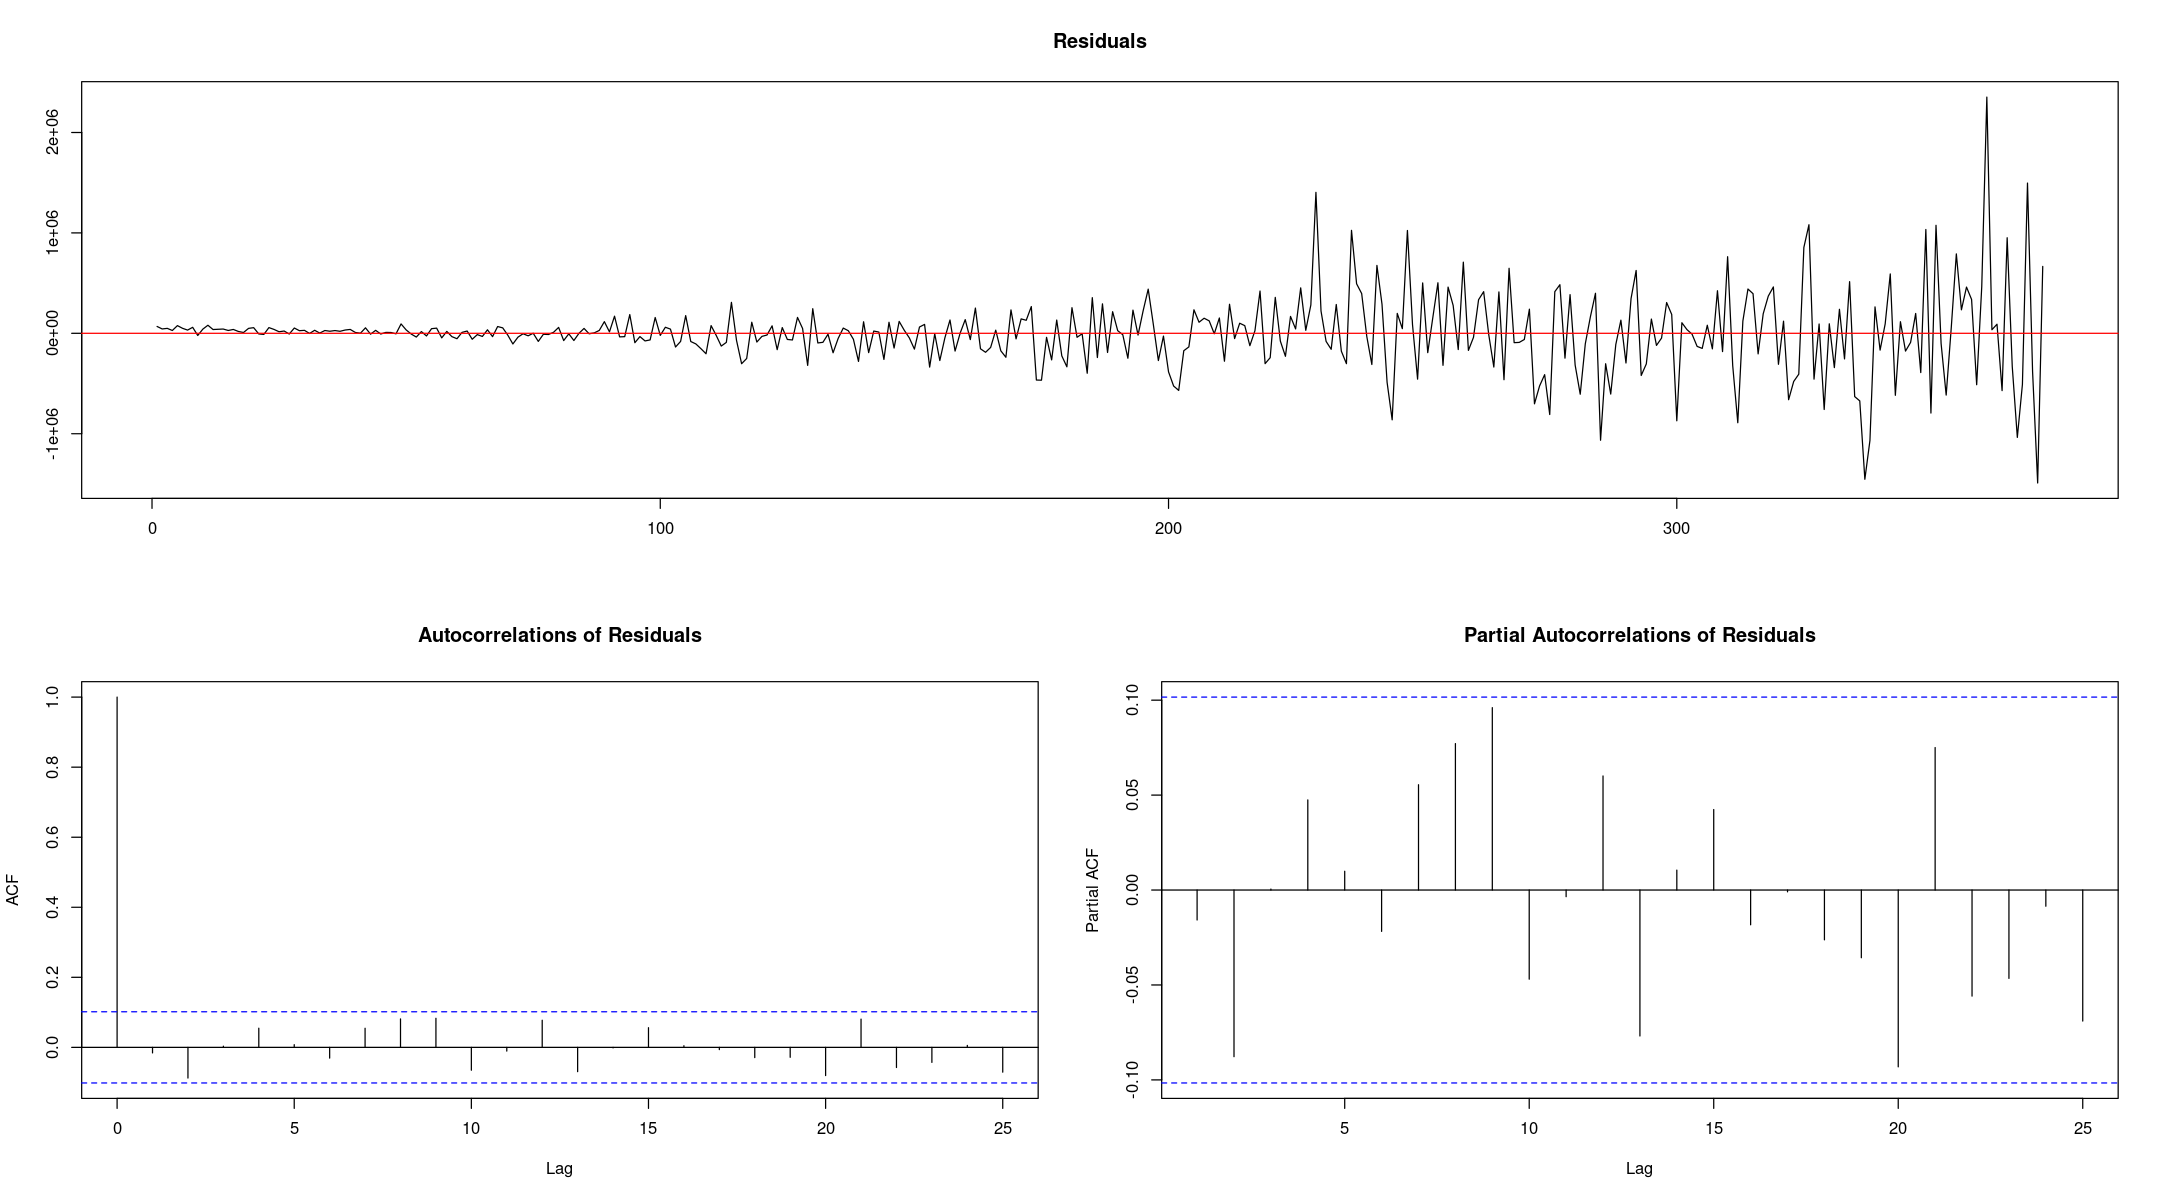

In [57]:
library(urca)

adf.trend_oil= ur.df(myts, type="trend", lags = 1); plot(adf.trend_oil)
summary(adf.trend_oil)


############################################### 
# Augmented Dickey-Fuller Test Unit Root Test # 
############################################### 

Test regression drift 


Call:
lm(formula = z.diff ~ z.lag.1 + 1 + z.diff.lag)

Residuals:
       Min         1Q     Median         3Q        Max 
-1539574.2  -136020.0   -27459.3   142855.2  2368803.9 

Coefficients:
                Estimate   Std. Error  t value   Pr(>|t|)    
(Intercept)  4.54879e+04  2.95780e+04  1.53790 0.12493098    
z.lag.1     -1.27470e-02  1.03983e-02 -1.22587 0.22102934    
z.diff.lag  -1.98543e-01  5.15668e-02 -3.85020 0.00013909 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 377299 on 369 degrees of freedom
Multiple R-squared:  0.045391,	Adjusted R-squared:  0.040217 
F-statistic: 8.77286 on 2 and 369 DF,  p-value: 0.000189586


Value of test-statistic is: -1.2259 1.1886 

Critical values for test statistics: 
      1pct  5pct 10pct
tau2 -3.44 -2.87 -2.57
phi1  

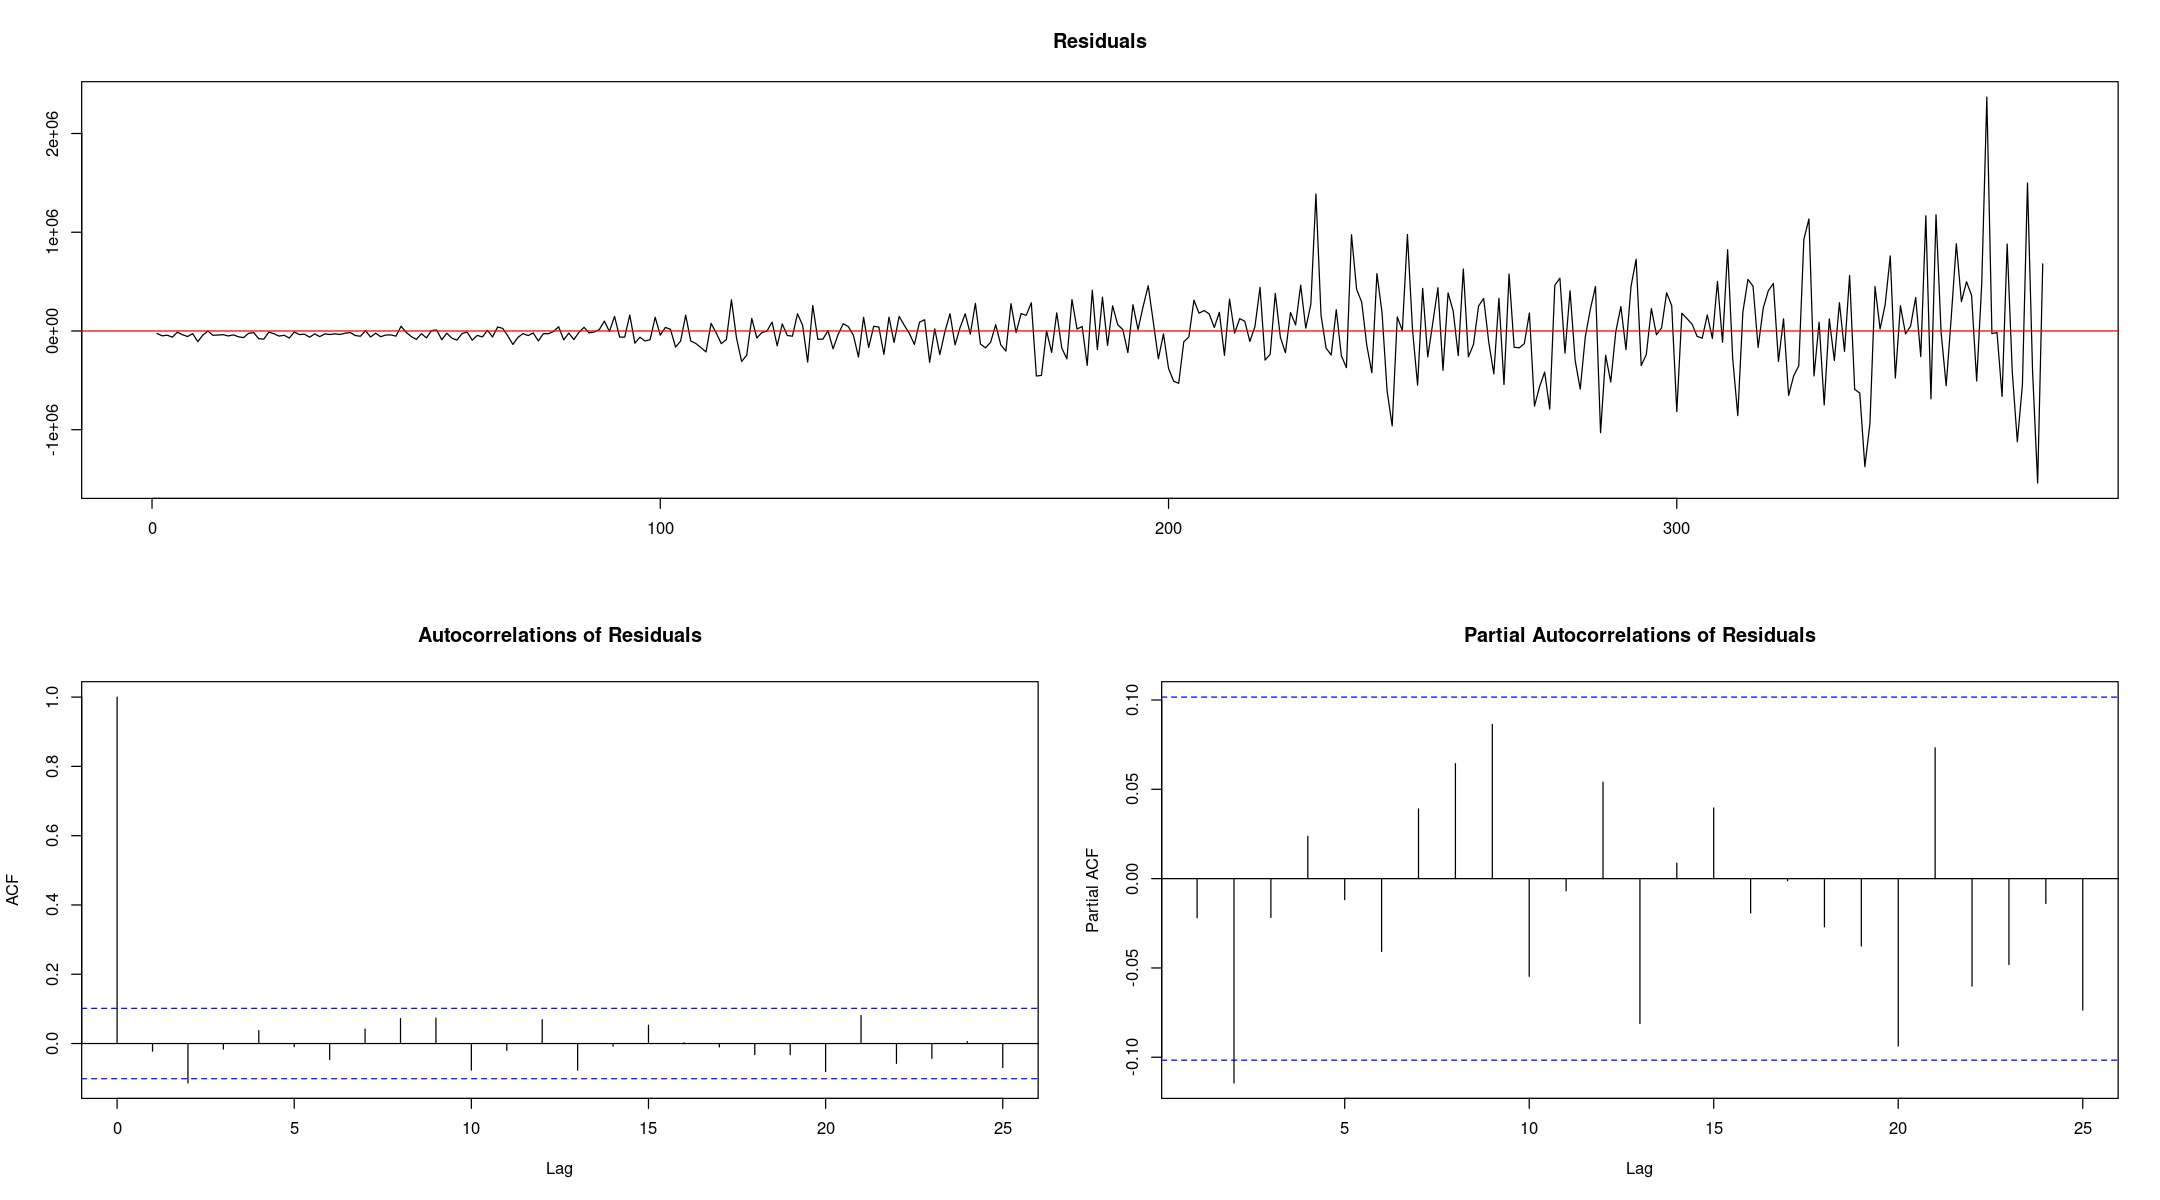

In [58]:
adf.drift_oil= ur.df(myts, type="drift", lags = 1); plot(adf.drift_oil)
summary(adf.drift_oil) 